In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary

import os
# remove local directory if it already exists
if os.path.isdir("ERA-V1-S7"):
    !rm -rf 'ERA-V1-S7'

!git clone https://github.com/pathToAIbyK/ERA-V1-S7.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'ERA-V1-S7'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 156 (delta 18), reused 1 (delta 1), pack-reused 123
Receiving objects: 100% (156/156), 637.23 KiB | 1.57 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.RandomRotation(degrees=(-5, 5),fill=(0,)),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=64, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
#import a python module from inside the library
import sys
sys.path.insert(1,f'/content/ERA-V1-S7')


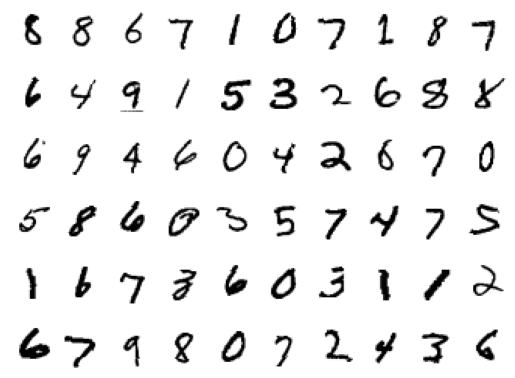

In [6]:
from utils import return_dataset_images

return_dataset_images(train_loader,60)

In [7]:
from model import Net_6,model_train,model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_6().to(device)
Net_6.model_summary(model,(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
            Conv2d-3           [-1, 16, 28, 28]           2,320
       BatchNorm2d-4           [-1, 16, 28, 28]              32
           Dropout-5           [-1, 16, 28, 28]               0
         MaxPool2d-6           [-1, 16, 14, 14]               0
            Conv2d-7            [-1, 8, 14, 14]           1,160
       BatchNorm2d-8            [-1, 8, 14, 14]              16
           Dropout-9            [-1, 8, 14, 14]               0
           Conv2d-10            [-1, 8, 14, 14]             584
      BatchNorm2d-11            [-1, 8, 14, 14]              16
          Dropout-12            [-1, 8, 14, 14]               0
        MaxPool2d-13              [-1, 8, 7, 7]               0
           Conv2d-14              

In [8]:
from torch.optim.lr_scheduler import StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
#optimizer = optim.Adam(model.parameters(), lr=0.001  , betas=(0.9, 0.99), eps=1e-8, amsgrad=False)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 0


Loss=0.03173372149467468 Batch_id=937 Accuracy=94.03: 100%|██████████| 938/938 [00:52<00:00, 17.92it/s]



Test set: Average loss: 0.0546, Accuracy: 9829/10000 (98.29%)

EPOCH: 1


Loss=0.03845035284757614 Batch_id=937 Accuracy=97.51: 100%|██████████| 938/938 [00:47<00:00, 19.80it/s]



Test set: Average loss: 0.0423, Accuracy: 9872/10000 (98.72%)

EPOCH: 2


Loss=0.0047906748950481415 Batch_id=937 Accuracy=97.85: 100%|██████████| 938/938 [00:48<00:00, 19.31it/s]



Test set: Average loss: 0.0426, Accuracy: 9857/10000 (98.57%)

EPOCH: 3


Loss=0.00502718985080719 Batch_id=937 Accuracy=98.16: 100%|██████████| 938/938 [00:46<00:00, 19.96it/s]



Test set: Average loss: 0.0308, Accuracy: 9897/10000 (98.97%)

EPOCH: 4


Loss=0.05272407457232475 Batch_id=937 Accuracy=98.26: 100%|██████████| 938/938 [00:48<00:00, 19.17it/s]



Test set: Average loss: 0.0305, Accuracy: 9897/10000 (98.97%)

EPOCH: 5


Loss=0.0114303482696414 Batch_id=937 Accuracy=98.47: 100%|██████████| 938/938 [00:49<00:00, 19.07it/s]



Test set: Average loss: 0.0285, Accuracy: 9910/10000 (99.10%)

EPOCH: 6


Loss=0.002350111724808812 Batch_id=937 Accuracy=98.46: 100%|██████████| 938/938 [00:48<00:00, 19.39it/s]



Test set: Average loss: 0.0313, Accuracy: 9897/10000 (98.97%)

EPOCH: 7


Loss=0.0066620586439967155 Batch_id=937 Accuracy=98.61: 100%|██████████| 938/938 [00:47<00:00, 19.72it/s]



Test set: Average loss: 0.0287, Accuracy: 9909/10000 (99.09%)

EPOCH: 8


Loss=0.005722785834223032 Batch_id=937 Accuracy=98.64: 100%|██████████| 938/938 [00:47<00:00, 19.71it/s]



Test set: Average loss: 0.0294, Accuracy: 9899/10000 (98.99%)

EPOCH: 9


Loss=0.004237910732626915 Batch_id=937 Accuracy=98.63: 100%|██████████| 938/938 [00:48<00:00, 19.47it/s]



Test set: Average loss: 0.0281, Accuracy: 9908/10000 (99.08%)

EPOCH: 10


Loss=0.01313207671046257 Batch_id=937 Accuracy=98.78: 100%|██████████| 938/938 [00:47<00:00, 19.65it/s]



Test set: Average loss: 0.0281, Accuracy: 9901/10000 (99.01%)

EPOCH: 11


Loss=0.017341192811727524 Batch_id=937 Accuracy=98.76: 100%|██████████| 938/938 [00:51<00:00, 18.36it/s]



Test set: Average loss: 0.0252, Accuracy: 9914/10000 (99.14%)

EPOCH: 12


Loss=0.03223687782883644 Batch_id=937 Accuracy=98.85: 100%|██████████| 938/938 [00:48<00:00, 19.36it/s]



Test set: Average loss: 0.0260, Accuracy: 9921/10000 (99.21%)

EPOCH: 13


Loss=0.0023447959683835506 Batch_id=937 Accuracy=98.83: 100%|██████████| 938/938 [00:50<00:00, 18.62it/s]



Test set: Average loss: 0.0245, Accuracy: 9924/10000 (99.24%)

EPOCH: 14


Loss=0.031113486737012863 Batch_id=937 Accuracy=98.89: 100%|██████████| 938/938 [00:48<00:00, 19.40it/s]



Test set: Average loss: 0.0248, Accuracy: 9922/10000 (99.22%)



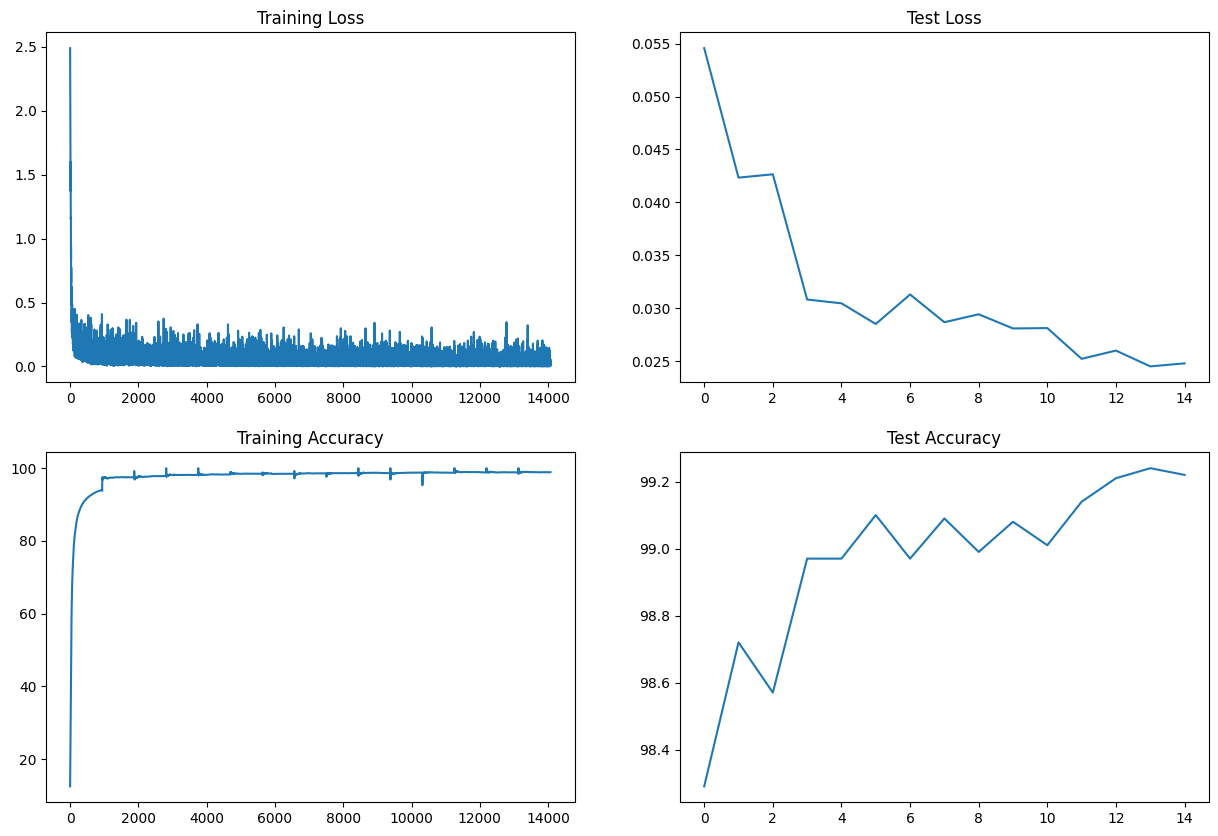

In [9]:
from model import draw_graph

draw_graph()